In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import zipfile

zip_path = "/content/drive/MyDrive/COVID-19 Dataset.zip"  # Path to your zip file
extract_folder = "/content/COVID-19_Dataset"  # Folder where we will extract the files


In [ ]:
# Check if the extraction folder exists, if not, create it
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
print("Files in dataset folder:")
print(os.listdir(extract_folder))  # List files and folders inside the extracted dataset


Files in dataset folder:
['COVID-19 Dataset']


# New Section

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import os


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil


In [ ]:
# covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/COVID"
# non_covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/Non-COVID"
# # base_dir = "/content/COVID-19_CT_Split"
# base_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT"

# train_dir = os.path.join(base_dir, "train")
# test_dir = os.path.join(base_dir, "test")

# train_covid = os.path.join(train_dir, "COVID")
# train_non_covid = os.path.join(train_dir, "Non-COVID")

# test_covid = os.path.join(test_dir, "COVID")
# test_non_covid = os.path.join(test_dir, "Non-COVID")

# # Create directories if not exist
# for path in [train_covid, train_non_covid, test_covid, test_non_covid]:
#     os.makedirs(path, exist_ok=True)


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
random.seed(42)

# Define dataset directories
covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/COVID"
non_covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/Non-COVID"
base_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT"

# Define split directories
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Create class directories in each split
for category in ["COVID", "Non-COVID"]:
    for split in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(split, category), exist_ok=True)

# Function to split and move files
def split_and_move(source_dir, train_dest, val_dest, test_dest, train_size=0.7, val_size=0.15, test_size=0.15):
    files = os.listdir(source_dir)
    train_files, temp_files = train_test_split(files, train_size=train_size, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=test_size / (test_size + val_size), random_state=42)

    for file in train_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(train_dest, file))
    for file in val_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(val_dest, file))
    for file in test_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(test_dest, file))

# Split and move files for both classes
split_and_move(covid_dir, os.path.join(train_dir, "COVID"), os.path.join(val_dir, "COVID"), os.path.join(test_dir, "COVID"))
split_and_move(non_covid_dir, os.path.join(train_dir, "Non-COVID"), os.path.join(val_dir, "Non-COVID"), os.path.join(test_dir, "Non-COVID"))

print("Dataset successfully split into Train, Validation, and Test sets!")


Dataset successfully split into Train, Validation, and Test sets!


In [ ]:
import os

train_covid = os.path.join(train_dir, "COVID")
train_non_covid = os.path.join(train_dir, "Non-COVID")
test_covid = os.path.join(test_dir, "COVID")
test_non_covid = os.path.join(test_dir, "Non-COVID")
valid_covid = os.path.join(val_dir, "COVID")
valid_non_covid = os.path.join(val_dir, "Non-COVID")

# Check if dataset folders exist and contain images
for path in [train_covid, train_non_covid, test_covid, test_non_covid, valid_covid, valid_non_covid]:
    print(f"Checking: {path}")
    if os.path.exists(path):
        print(f"✅ {path} exists. Contains {len(os.listdir(path))} images.")
    else:
        print(f"❌ {path} is MISSING!")


Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/COVID exists. Contains 3798 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/Non-COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/Non-COVID exists. Contains 1839 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/COVID exists. Contains 814 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/Non-COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/Non-COVID exists. Contains 395 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/COVID exists. Contains 814 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/Non-COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/Non-COVID exists. Contains 394 images.


In [ ]:
import os

covid_images = os.listdir(covid_dir)
non_covid_images = os.listdir(non_covid_dir)

print("Total COVID Images:", len(covid_images))
print("Total Non-COVID Images:", len(non_covid_images))


Total COVID Images: 0
Total Non-COVID Images: 0


In [ ]:
import zipfile

# Path to the zip file
zip_path = "/content/drive/MyDrive/COVID-19 Dataset.zip"  # Change if needed
extract_folder = "/content/COVID-19_Dataset"

# Re-extract the dataset
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Dataset re-extracted successfully!")

# Verify dataset structure again
print("Files in dataset folder:", os.listdir(extract_folder))


✅ Dataset re-extracted successfully!
Files in dataset folder: ['COVID-19 Dataset']


In [ ]:
# import shutil
# from sklearn.model_selection import train_test_split

# # Define dataset paths again
# covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/COVID"
# non_covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/Non-COVID"

# if not os.path.exists(covid_dir) or not os.path.exists(non_covid_dir):
#     print("❌ ERROR: COVID or Non-COVID folders are missing!")
# else:
#     print("✅ COVID and Non-COVID folders found!")

# # Re-create train/test folders
# for path in [train_covid, train_non_covid, test_covid, test_non_covid, valid_covid, valid_non_covid]:
#     os.makedirs(path, exist_ok=True)

# # List available images
# covid_images = os.listdir(covid_dir)
# non_covid_images = os.listdir(non_covid_dir)

# # Split dataset (80% train, 20% test)
# train_covid_imgs, test_covid_imgs = train_test_split(covid_images, test_size=0.2, random_state=42)
# train_non_covid_imgs, test_non_covid_imgs = train_test_split(non_covid_images, test_size=0.2, random_state=42)

# # Move images to respective folders
# for img in train_covid_imgs:
#     shutil.move(os.path.join(covid_dir, img), os.path.join(train_covid, img))

# for img in test_covid_imgs:
#     shutil.move(os.path.join(covid_dir, img), os.path.join(test_covid, img))

# for img in train_non_covid_imgs:
#     shutil.move(os.path.join(non_covid_dir, img), os.path.join(train_non_covid, img))

# for img in test_non_covid_imgs:
#     shutil.move(os.path.join(non_covid_dir, img), os.path.join(test_non_covid, img))

# print("✅ Dataset successfully split into train and test sets!")

# # Verify dataset distribution again
# print("COVID Train Images:", len(os.listdir(train_covid)))
# print("Non-COVID Train Images:", len(os.listdir(train_non_covid)))
# print("COVID Test Images:", len(os.listdir(test_covid)))
# print("Non-COVID Test Images:", len(os.listdir(test_non_covid)))


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/COVID"
non_covid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/Non-COVID"
base_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

train_covid = os.path.join(train_dir, "COVID")
val_covid = os.path.join(val_dir, "COVID")
test_covid = os.path.join(test_dir, "COVID")

train_non_covid = os.path.join(train_dir, "Non-COVID")
val_non_covid = os.path.join(val_dir, "Non-COVID")
test_non_covid = os.path.join(test_dir, "Non-COVID")

# Create directories if not exist
for path in [train_covid, val_covid, test_covid, train_non_covid, val_non_covid, test_non_covid]:
    os.makedirs(path, exist_ok=True)

# List images
covid_images = os.listdir(covid_dir)
non_covid_images = os.listdir(non_covid_dir)

# Split dataset (80% train, 20% test)
train_covid_imgs, test_covid_imgs = train_test_split(covid_images, test_size=0.2, random_state=42)
train_non_covid_imgs, test_non_covid_imgs = train_test_split(non_covid_images, test_size=0.2, random_state=42)

# Further split training set (70% train, 10% validation)
train_covid_imgs, val_covid_imgs = train_test_split(train_covid_imgs, test_size=0.125, random_state=42)  # 10% of total
train_non_covid_imgs, val_non_covid_imgs = train_test_split(train_non_covid_imgs, test_size=0.125, random_state=42)

# Move images to respective folders
for img in train_covid_imgs:
    shutil.move(os.path.join(covid_dir, img), os.path.join(train_covid, img))
for img in val_covid_imgs:
    shutil.move(os.path.join(covid_dir, img), os.path.join(val_covid, img))
for img in test_covid_imgs:
    shutil.move(os.path.join(covid_dir, img), os.path.join(test_covid, img))

for img in train_non_covid_imgs:
    shutil.move(os.path.join(non_covid_dir, img), os.path.join(train_non_covid, img))
for img in val_non_covid_imgs:
    shutil.move(os.path.join(non_covid_dir, img), os.path.join(val_non_covid, img))
for img in test_non_covid_imgs:
    shutil.move(os.path.join(non_covid_dir, img), os.path.join(test_non_covid, img))

print("✅ Dataset successfully split into Train, Validation, and Test sets!")

# Verify dataset distribution
print("COVID Train Images:", len(os.listdir(train_covid)))
print("COVID Validation Images:", len(os.listdir(val_covid)))
print("COVID Test Images:", len(os.listdir(test_covid)))
print("Non-COVID Train Images:", len(os.listdir(train_non_covid)))
print("Non-COVID Validation Images:", len(os.listdir(val_non_covid)))
print("Non-COVID Test Images:", len(os.listdir(test_non_covid)))


✅ Dataset successfully split into Train, Validation, and Test sets!
COVID Train Images: 4263
COVID Validation Images: 1318
COVID Test Images: 1352
Non-COVID Train Images: 2069
Non-COVID Validation Images: 637
Non-COVID Test Images: 652


In [ ]:
import os

train_covid = os.path.join(train_dir, "COVID")
train_non_covid = os.path.join(train_dir, "Non-COVID")
test_covid = os.path.join(test_dir, "COVID")
test_non_covid = os.path.join(test_dir, "Non-COVID")
valid_covid = os.path.join(val_dir, "COVID")
valid_non_covid = os.path.join(val_dir, "Non-COVID")

# Check if dataset folders exist and contain images
for path in [train_covid, train_non_covid, test_covid, test_non_covid, valid_covid,valid_non_covid]:
    print(f"Checking: {path}")
    if os.path.exists(path):
        print(f"✅ {path} exists. Contains {len(os.listdir(path))} images.")
    else:
        print(f"❌ {path} is MISSING!")


Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/COVID exists. Contains 4263 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/Non-COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/train/Non-COVID exists. Contains 2069 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/COVID exists. Contains 1352 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/Non-COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/test/Non-COVID exists. Contains 652 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/COVID exists. Contains 1318 images.
Checking: /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/Non-COVID
✅ /content/COVID-19_Dataset/COVID-19 Dataset/CT/val/Non-COVID exists. Contains 637 images.


In [ ]:
# Define ImageDataGenerator and load images
img_size = 224
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Add brightness variation
    fill_mode='nearest'
)

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/COVID-19_Dataset/COVID-19 Dataset/CT/train",  # Fixed path
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'  # Ensure dataset only has two classes
)

test_generator = test_datagen.flow_from_directory(
    "/content/COVID-19_Dataset/COVID-19 Dataset/CT/test",  # Fixed path
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)


Found 6331 images belonging to 2 classes.
Found 2004 images belonging to 2 classes.


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt

# # Define Image Parameters
# img_size = 224
# batch_size = 32

# # Define the dataset paths again
# train_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/train"
# test_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/test"

# # Ensure the dataset paths exist
# import os
# if not os.path.exists(train_dir) or not os.path.exists(test_dir):
#     print("Error: Train or Test directories not found! Please check dataset extraction and splitting.")
# else:
#     print("Train and Test directories found!")

# # Define Data Generators
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# # Load Train and Test Data
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     class_mode='binary'
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     class_mode='binary'
# )

# # Confirm Generator is Loaded
# print("Data Generators Ready!")

# # Get batch of images and labels
# sample_images, sample_labels = next(train_generator)

# # Show sample images
# fig, axes = plt.subplots(1, 10, figsize=(15, 5))
# for i in range(10):
#     ax = axes[i]
#     ax.imshow(sample_images[i])
#     ax.set_title("COVID" if sample_labels[i] == 1 else "Non-COVID")
#     ax.axis("off")

# plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define parameters
# img_size = 224
# batch_size = 32

# # Data augmentation for training
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'

img_size = 224
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Add brightness variation
    fill_mode='nearest'
)

# No augmentation for validation & test (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Define dataset paths
train_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/train"
val_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/val"
test_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/test"

# Load training data with augmentations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

# Load validation data (no augmentation)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

# Load test data (no augmentation)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Ensure test data is not shuffled for evaluation
)

print("✅ Data generators successfully created!")


Found 6331 images belonging to 2 classes.
Found 1955 images belonging to 2 classes.
Found 2004 images belonging to 2 classes.
✅ Data generators successfully created!


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# import os

# # Define Image Parameters
# img_size = 224
# batch_size = 32

# # Define dataset paths
# train_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/train"
# valid_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/valid"
# test_dir = "/content/COVID-19_Dataset/COVID-19 Dataset/CT/test"

# # Ensure dataset paths exist
# for path in [train_dir, valid_dir, test_dir]:
#     if not os.path.exists(path):
#         print(f"❌ Error: {path} not found! Please check dataset extraction and splitting.")
#     else:
#         print(f"✅ {path} exists!")

# # Define Data Generators
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# valid_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation
# test_datagen = ImageDataGenerator(rescale=1./255)   # No augmentation for test set

# # Create Train Generator
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     class_mode='binary'
# )

# # Create Validation Generator
# valid_generator = valid_datagen.flow_from_directory(
#     valid_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     class_mode='binary'
# )

# # Create Test Generator (Only for final evaluation)
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     class_mode='binary',
#     shuffle=False  # Important: Do not shuffle for test set
# )

# # Confirm Generators are Loaded
# print("\n✅ Data Generators Ready!")
# print(f"Training Samples: {train_generator.samples}")
# print(f"Validation Samples: {valid_generator.samples}")
# print(f"Test Samples: {test_generator.samples}")

# # Get batch of images and labels from train generator
# sample_images, sample_labels = next(train_generator)

# # Show sample images
# fig, axes = plt.subplots(1, 10, figsize=(15, 5))
# for i in range(10):
#     ax = axes[i]
#     ax.imshow(sample_images[i])
#     ax.set_title("COVID" if sample_labels[i] == 1 else "Non-COVID")
#     ax.axis("off")

# plt.show()


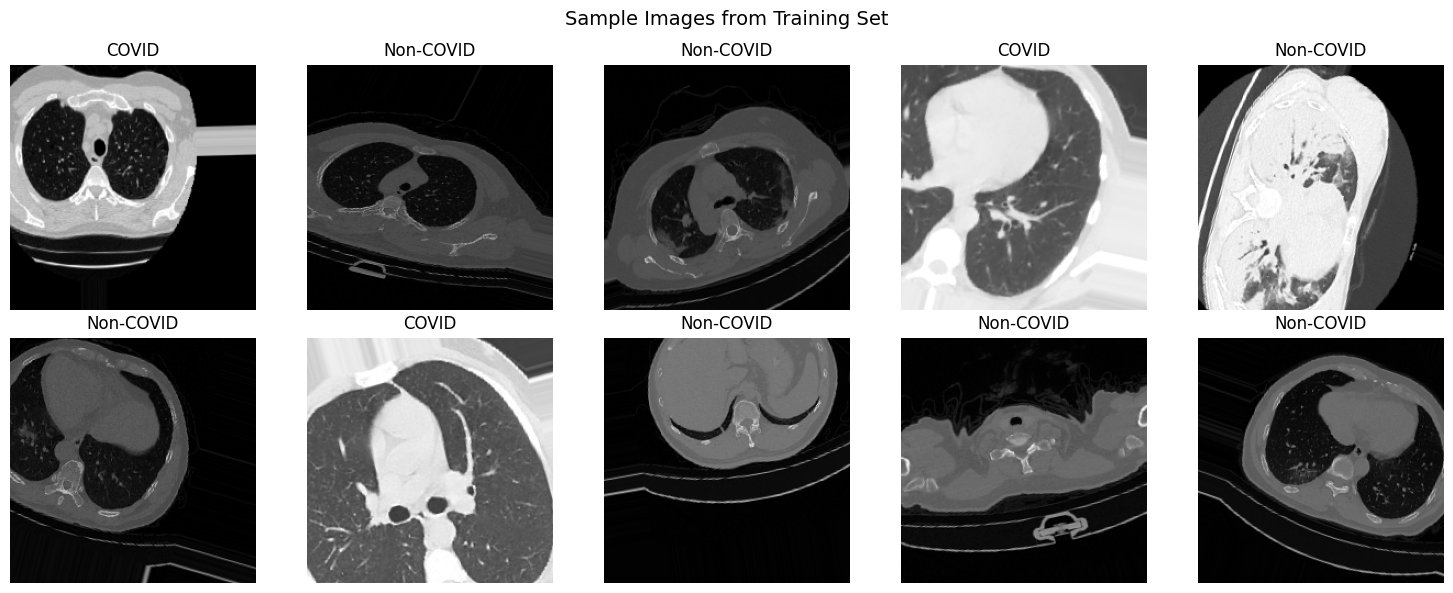

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
sample_images, sample_labels = next(train_generator)

# Define number of images to display
num_images = min(10, len(sample_images))  # Ensure we don't exceed batch size

# Determine grid layout (e.g., 2 rows of 5)
rows = 2 if num_images > 5 else 1
cols = (num_images + 1) // rows  # Auto-adjust columns

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
fig.suptitle("Sample Images from Training Set", fontsize=14)

# Flatten axes array for easy indexing
axes = np.array(axes).flatten()

# Plot images
for i in range(num_images):
    ax = axes[i]
    ax.imshow(sample_images[i])
    ax.set_title("COVID" if sample_labels[i] == 1 else "Non-COVID")
    ax.axis("off")

# Hide any unused subplots
for j in range(num_images, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the VGG19 model without the top fully connected layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base (optional: can be fine-tuned later)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)  # Flatten output from convolutional layers
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Print model summary
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# from tensorflow.keras.optimizers import Adam

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with a small learning rate
#               loss='binary_crossentropy',  # Binary classification loss
#               metrics=['accuracy'])  # Track accuracy


In [ ]:
# history = model.fit(
#     train_generator,
#     validation_data=test_generator,
#     epochs=20,  # Adjust based on performance
#     batch_size=32  # Ensure batch size matches ImageDataGenerator
# )


In [24]:
# Unfreeze last 4 layers for fine-tuning
# for layer in base_model.layers[-4:]:
#     layer.trainable = True


for layer in base_model.layers[-6:]:  # Instead of -4, use -6 or -8
    layer.trainable = True


# # Compile again with a lower learning rate
# from tensorflow.keras.optimizers import Adam
# model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Retrain for a few more epochs
# history_finetune = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=10,  # Fine-tune for a few more epochs
#     batch_size=32
# )




from tensorflow.keras.optimizers import Adam

# Assign more weight to COVID class (1.3) to handle class imbalance
class_weights = {0: 1.0, 1: 1.3}

# Compile the model again
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=32,
    class_weight=class_weights  # Add class weight parameter here
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 184s 837ms/step - accuracy: 0.6933 - loss: 0.6335 - val_accuracy: 0.8660 - val_loss: 0.2766
Epoch 2/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 136s 689ms/step - accuracy: 0.8556 - loss: 0.3404 - val_accuracy: 0.8972 - val_loss: 0.2305
Epoch 3/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 136s 688ms/step - accuracy: 0.8875 - loss: 0.2767 - val_accuracy: 0.9197 - val_loss: 0.1909
Epoch 4/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 142s 689ms/step - accuracy: 0.9069 - loss: 0.2524 - val_accuracy: 0.9197 - val_loss: 0.1828
Epoch 5/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 136s 688ms/step - accuracy: 0.9062 - loss: 0.2383 - val_accuracy: 0.9171 - val_loss: 0.1822
Epoch 6/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 135s 684ms/step - accuracy: 0.9142 - loss: 0.2172 - val_accuracy: 0.9161 - val_loss: 0.1803
Epoch 7/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 143s 687ms/step - accuracy: 0.9288 - loss: 0.1954 - val_accuracy: 0.9269 - val_loss: 0.1748
Epoch 8/40
198/198 ━━━━━━━━━━━━━━━━━━━━ 142s 688ms/step - accuracy: 0.9209 -

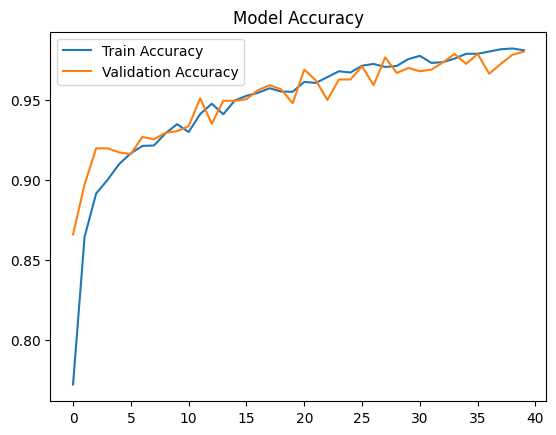

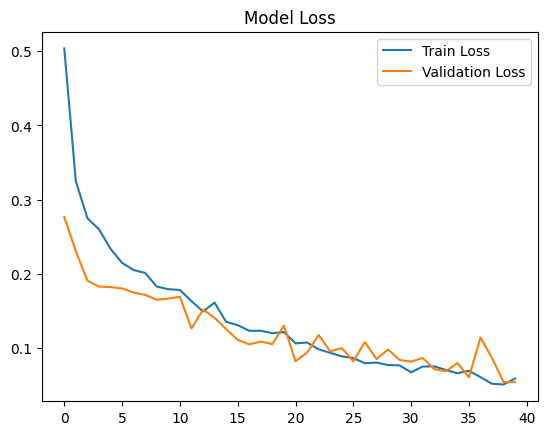

In [25]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Loss
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [26]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# # Path to a new CT scan image
# img_path = "/content/new_ct_scan.jpg"  # Change this to your test image path

# # Load and preprocess the image
# img = image.load_img(img_path, target_size=(224, 224))  # Resize to VGG-19 input size
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# # Make prediction
# prediction = model.predict(img_array)

# # Interpret result
# if prediction[0][0] > 0.5:
#     print("Prediction: ✅ COVID Detected")
# else:
#     print("Prediction: ❌ Non-COVID")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - accuracy: 0.9607 - loss: 0.0949

✅ Test Accuracy: 0.9731 | Test Loss: 0.0809


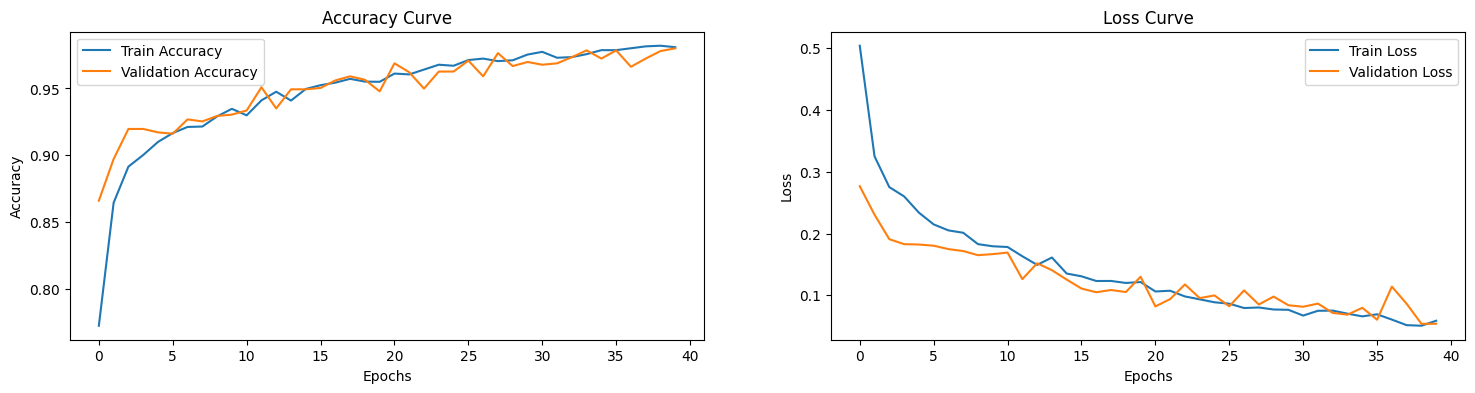

63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step

Classification Report:
              precision    recall  f1-score   support

   Non-COVID       0.98      0.98      0.98      1352
       COVID       0.96      0.96      0.96       652

    accuracy                           0.97      2004
   macro avg       0.97      0.97      0.97      2004
weighted avg       0.97      0.97      0.97      2004



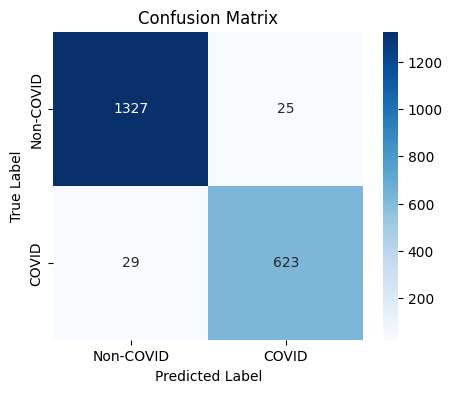

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


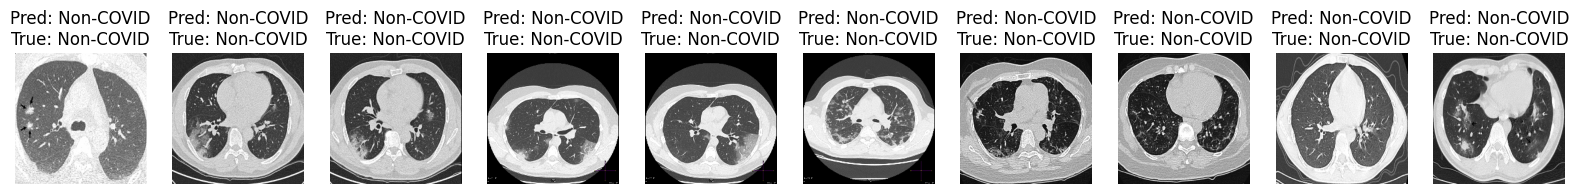

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 🟢 **Evaluate Model on Test Set**
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# 🟢 **Plot Training & Validation Curves**
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))

    # Accuracy Curve
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title("Accuracy Curve")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend()

    # Loss Curve
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title("Loss Curve")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Loss")
    axes[1].legend()

    plt.show()

# Call the function to plot training history
plot_training_history(history_finetune)

# 🟢 **Generate Predictions on Test Set**
y_true = test_generator.classes  # True labels
y_pred_probs = model.predict(test_generator)  # Get predicted probabilities
y_pred = (y_pred_probs > 0.5).astype("int").flatten()  # Convert to binary labels

# 🟢 **Classification Report**
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Non-COVID", "COVID"]))

# 🟢 **Confusion Matrix**
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-COVID", "COVID"], yticklabels=["Non-COVID", "COVID"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🟢 **Visualizing Some Predictions**
def visualize_predictions(model, generator, num_images=10):
    images, labels = next(generator)  # Get a batch of images
    preds = (model.predict(images) > 0.5).astype("int").flatten()  # Predict labels

    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_title(f"Pred: {'COVID' if preds[i] == 1 else 'Non-COVID'}\nTrue: {'COVID' if labels[i] == 1 else 'Non-COVID'}")
        ax.axis("off")
    plt.show()

# Call the function to visualize predictions
visualize_predictions(model, test_generator)
